### Importing all the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Creating dataframe

In [2]:
# inserting the dataset using read_csv and creating dataframe "df"
data = pd.read_csv("hotel_bookings.csv")

In [3]:
# creating a copy of dataset using copy() function
df=data.copy()

In [4]:
# to get the top 10 rows of dataset head() is used.
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


* The dataset has 33 columns which means it has 32 input columns and 1 output column.
* As we can see the output column is "is_canceled" which have only two classes 0 and 1 , hence the dataset is of classification type.

In [5]:
# to check the unique values of output column , unique function is used.
df["is_canceled"].unique()

array([0, 1], dtype=int64)

In [6]:
# to check the information of dataset info() is used.
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* The dataset has 119390 rows and 33 columns.
* It has 16 integer, 4 float and 12 object type columns and some of the columns have null values.
* The reservation_statue_date is of object type ,which we have to convert into datetime format.

In [7]:
# Converting reservation_status_date from object to datetime format
df["reservation_status_date"] = pd.DatetimeIndex(df["reservation_status_date"])

In [8]:
## Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
# checking the null values in the columns.
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

* As we can see that there are three columns which consist null values, so we will try to remove or if we do not find any realtion of the column with output column we will drop that input column.
* The columns "company" & "agents" have lot of null value , hence we have to drop it.

In [10]:
# dropping columns "company" and "agent".
df.drop(["company","agent"], axis=1 ,inplace = True)

In [11]:
# Checking description using describe()
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363,2016-07-31 13:45:35.083340288
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798,NaN


* As describe() by default shows description of only numeric column, hence 21 columns have been shown.
* The columns lead_time, agent has big difference in mean and 50% data , which means it is not normally distributed.
* Rest columns shown above like arrival_date_year, arrival_date_week_number, arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights etc. have small or no difference in mean and 50% data. which shows they are normally distributed.

In [12]:
# checking description of only object column
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


* The above action shows the desription of only object columns.
* This shows total counts, unique values and top value with its frequency.

In [13]:
df.duplicated().sum()

32020

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

### Data Cleaning & Ouliers Handling

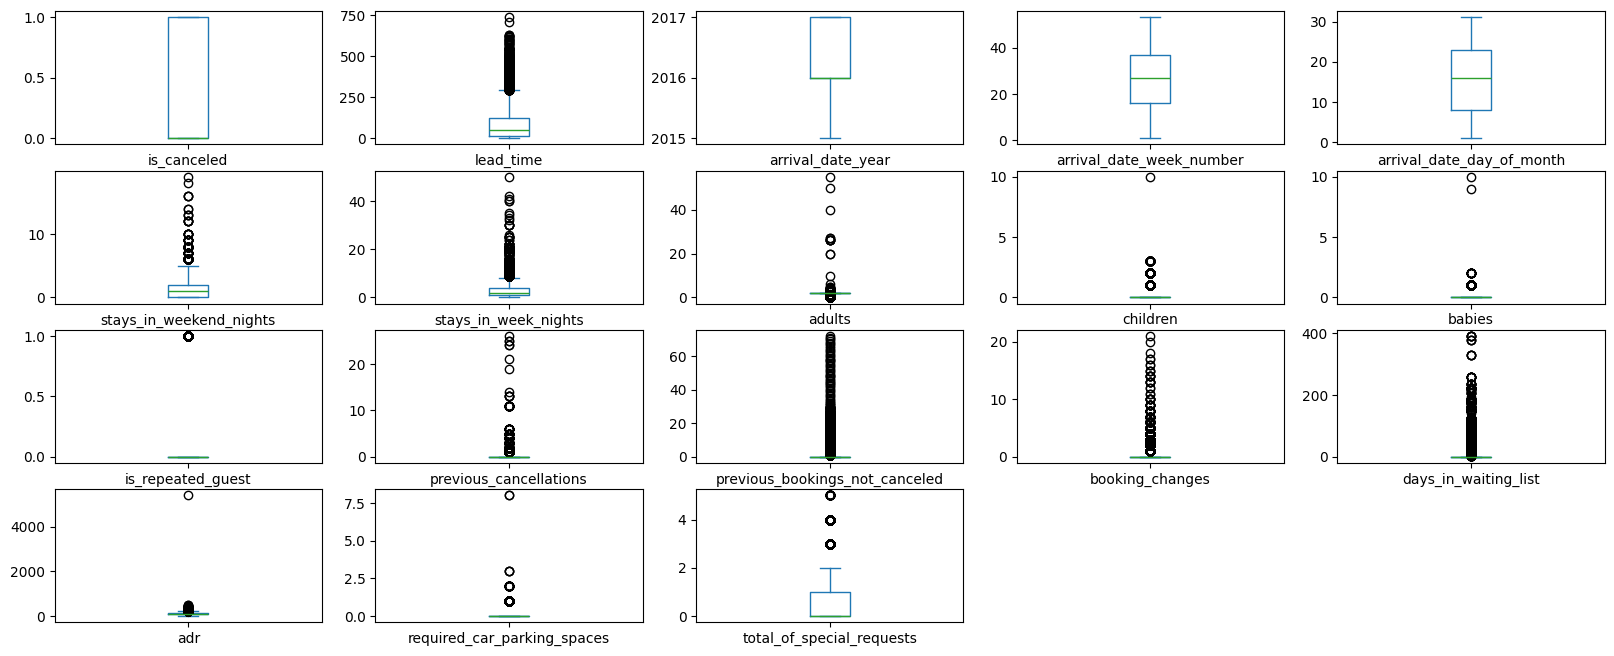

In [16]:
# Checking for the outliers in all columns at once using box plot.
df.plot(kind ="box", subplots=True,layout =(5,5), figsize =(20,10))
plt.show()

In [17]:
# Dropping null values if any
df.dropna(inplace=True)

In [18]:
# head() -> Prints top 5 rows data for all columns.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [19]:
## Returns sum of all null values.
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

* As we can see that there are no null values present in our dataset.

#### Working on Lead Time 

<Axes: >

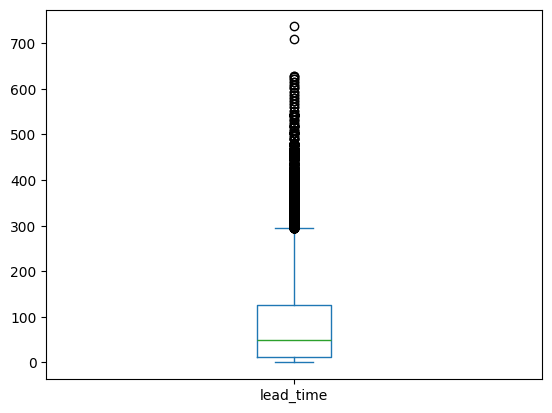

In [20]:
## Plotting box plot to see outliers in the column.
df["lead_time"].plot.box()

In [21]:
## Checking quantile value to remove outliers
df["lead_time"].quantile(0.98)

316.0

In [22]:
## Applying filter to remove outliers and taking values of lead time <= 320 and saving that data again in df.
df = df[df["lead_time"]<=320]

<Axes: >

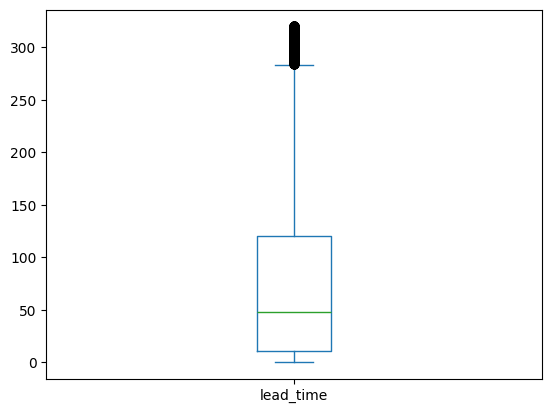

In [23]:
## Plotting box plot after removing outliers
df["lead_time"].plot.box()

In [24]:
## Checking shape of the lead_time column
df["lead_time"].shape

(85359,)

#### Working on Stays In Weekend Nights

<Axes: >

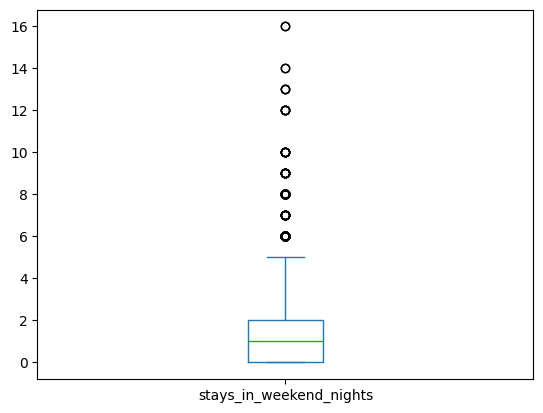

In [25]:
## Plotting box plot to see outliers in the column.
df["stays_in_weekend_nights"].plot.box()

In [26]:
## Checking quantile value to remove outliers
df["stays_in_weekend_nights"].quantile(0.99)

4.0

In [27]:
## Applying filter to remove outliers and taking values of stays_in_weekend_nights <= 4 and saving that data again in df.
df = df[df["stays_in_weekend_nights"]<=4]

<Axes: >

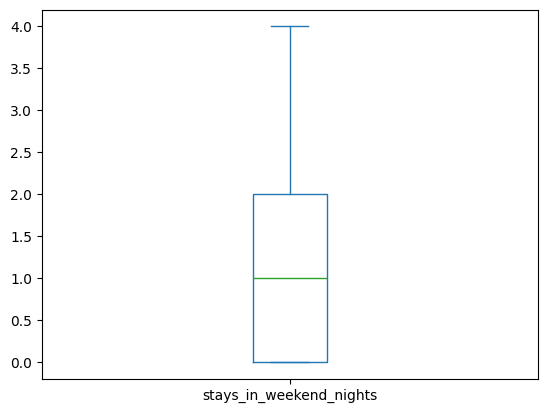

In [28]:
## Plotting box plot after removing outliers
df["stays_in_weekend_nights"].plot.box()

In [29]:
## Checking shape of the stays_in_weekend_nights column
df["stays_in_weekend_nights"].shape

(85079,)

#### Working on Stays In Week Nights


<Axes: >

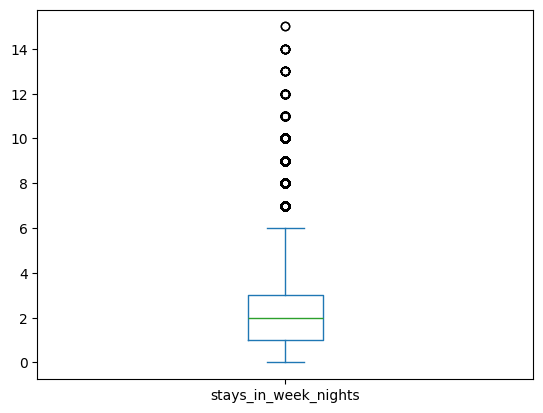

In [30]:
## Plotting box plot to see outliers in the column.
df["stays_in_week_nights"].plot.box()

In [31]:
## Checking quantile value to remove outliers
df["stays_in_week_nights"].quantile(0.97)

7.0

In [32]:
## Applying filter to remove outliers and taking values of stays_in_week_nights <= 6 and saving that data again in df.
df = df[df["stays_in_week_nights"]<=6]

<Axes: >

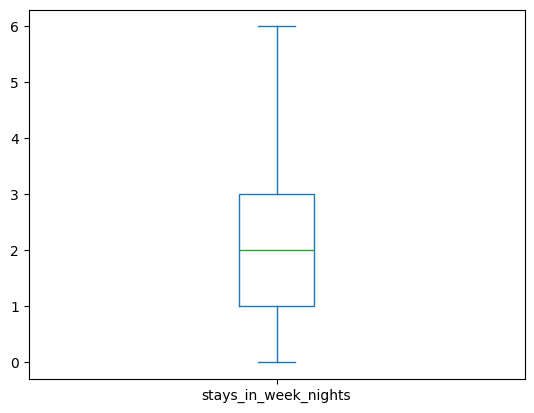

In [33]:
## Plotting box plot after removing outliers
df["stays_in_week_nights"].plot.box()

In [34]:
## Checking shape of the stays_in_weekend_nights column
df["stays_in_week_nights"].shape

(82429,)

#### Working on Adults Column

<Axes: >

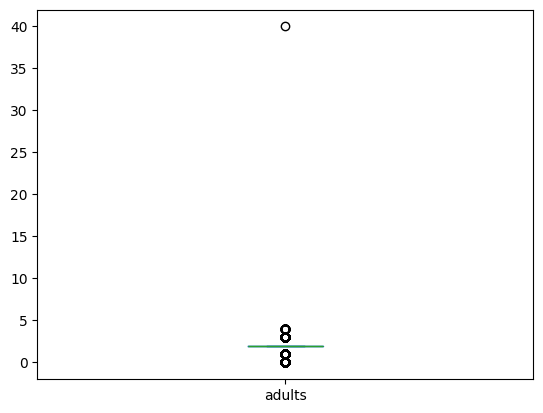

In [35]:
## Plotting box plot to see outliers in the column.
df["adults"].plot.box()

In [36]:
## Checking quantile value to remove outliers
df["adults"].quantile(0.94)

3.0

In [37]:
## Applying filter to remove outliers and taking values of adults <=2.5 and saving that data again in df.
df = df[df["adults"]<=2.5]

<Axes: >

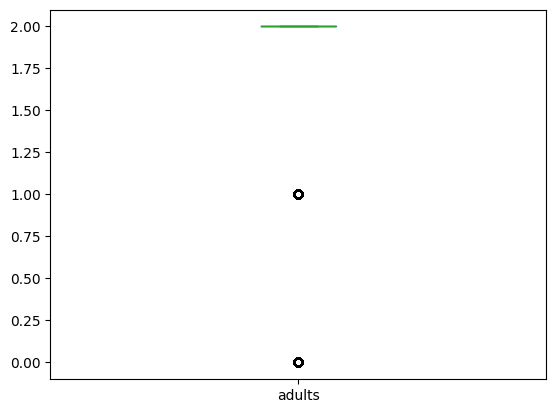

In [38]:
## Plotting box plot after removing outliers.
df["adults"].plot.box()

In [39]:
## Checking shape after removing outliers, how many data we have in adults column.
df["adults"].shape

(76641,)

In [40]:
## Checking overall shape of the data frame
df.shape

(76641, 30)

#### Working on Childern Column

<Axes: >

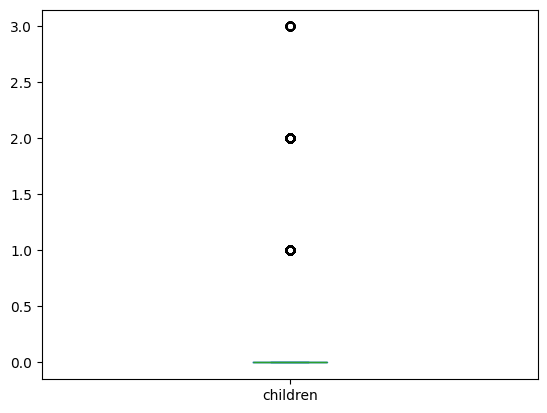

In [41]:
## Plotting box plot to see outliers in the column.
df["children"].plot.box()

In [42]:
## Checking quantile value to remove outliers
df["children"].quantile(0.95)

1.0

In [43]:
## Applying filter to remove outliers and taking values ofchildren <= 1 and saving that data again in df.
df = df[df["children"]<=1]

<Axes: >

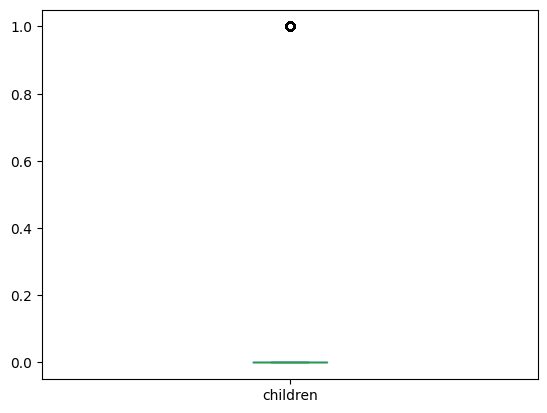

In [44]:
## Plotting box plot after removing outliers.
df["children"].plot.box()

In [45]:
## Checking overall shape of the data frame
df.shape

(73192, 30)

#### Working on Babies Column

<Axes: >

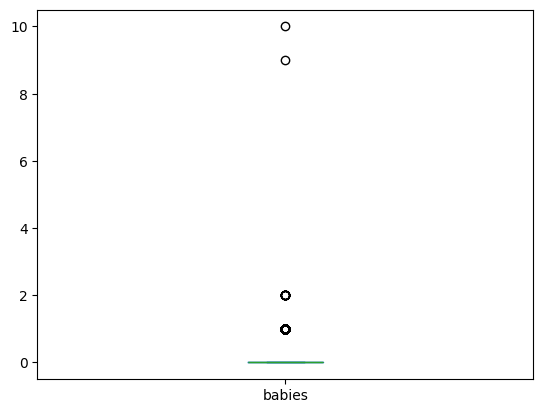

In [46]:
## Plotting box plot to see outliers in the column.
df["babies"].plot.box()

In [47]:
## Checking quantile value to remove outliers
df["babies"].quantile(0.99)

1.0

In [48]:
## Applying filter to remove outliers and taking values of babies <= 0 and saving that data again in df.
df = df[df["babies"]<=0]

<Axes: >

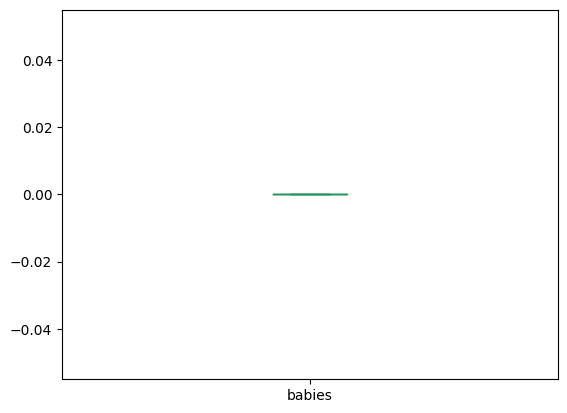

In [49]:
## Plotting box plot after removing outliers.
df["babies"].plot.box()

#### Working on Previous Cancellation Column

<Axes: >

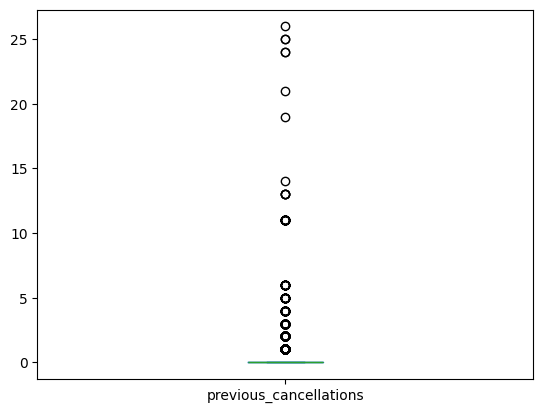

In [50]:
## Plotting box plot to see outliers in the column.
df["previous_cancellations"].plot.box()

In [51]:
## Checking quantile value to remove outliers
df["previous_cancellations"].quantile(0.95)

0.0

In [52]:
## Applying filter to remove outliers and taking values of previous_cancellations <= 1 and saving that data again in df.
df = df[df["previous_cancellations"]<=1]

<Axes: >

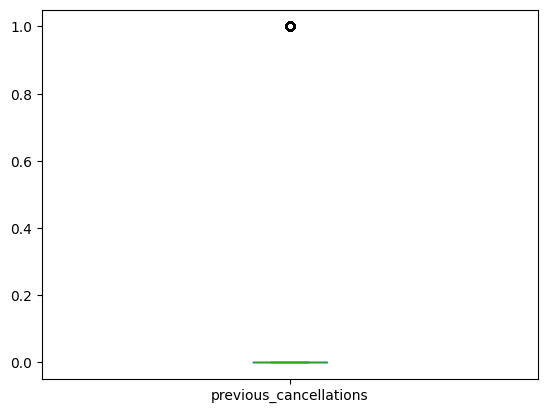

In [53]:
## Plotting box plot after removing outliers.
df["previous_cancellations"].plot.box()

In [54]:
## Checking overall shape of the data frame
df.shape

(72097, 30)

#### Working on Previous Bookings not Cancelled

<Axes: >

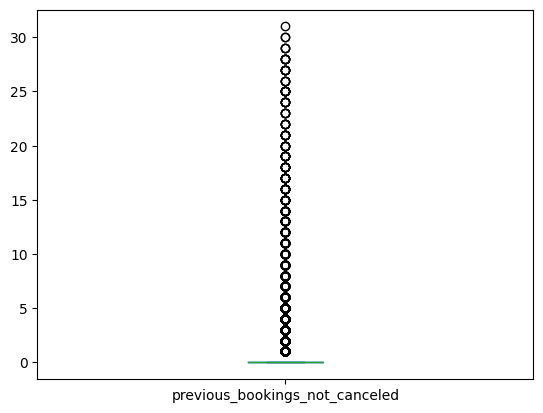

In [55]:
## Plotting box plot to see outliers in the column.
df["previous_bookings_not_canceled"].plot.box()

In [56]:
## Checking quantile value to remove outliers
df["previous_bookings_not_canceled"].quantile(0.95)

0.0

In [57]:
## Applying filter to remove outliers and taking values of previous_bookings_not_canceled<= 0 and saving that data again in df.
df = df[df["previous_bookings_not_canceled"]<=0]

<Axes: >

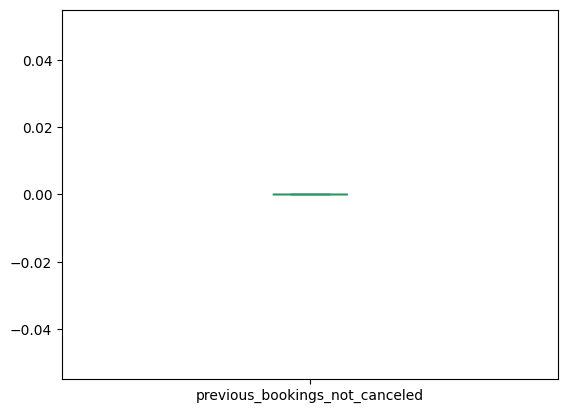

In [58]:
## Plotting box plot after removing outliers.
df["previous_bookings_not_canceled"].plot.box()

In [59]:
## Checking overall shape of the data frame
df.shape

(69180, 30)

#### Working on Booking Changes

<Axes: >

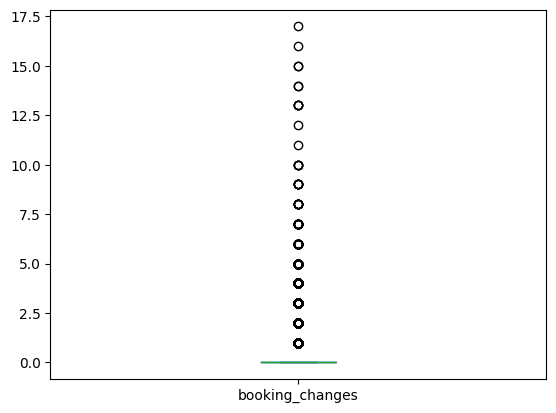

In [60]:
## Plotting box plot to see outliers in the column.
df["booking_changes"].plot.box()

In [61]:
## Checking quantile value to remove outliers
df["booking_changes"].quantile(0.95)

2.0

In [62]:
## Applying filter to remove outliers and taking values of booking_changes<= 1.0 and saving that data again in df.
df = df[df["booking_changes"]<= 1.0]

<Axes: >

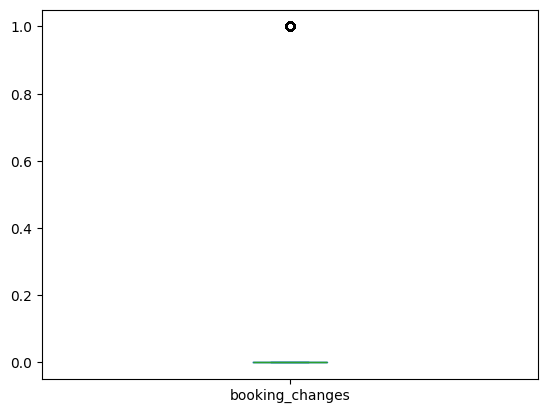

In [63]:
## Plotting box plot after removing outliers.
df["booking_changes"].plot.box()

In [64]:
## Checking overall shape of the data frame
df.shape

(65580, 30)

#### Working on Days In Waiting List

<Axes: >

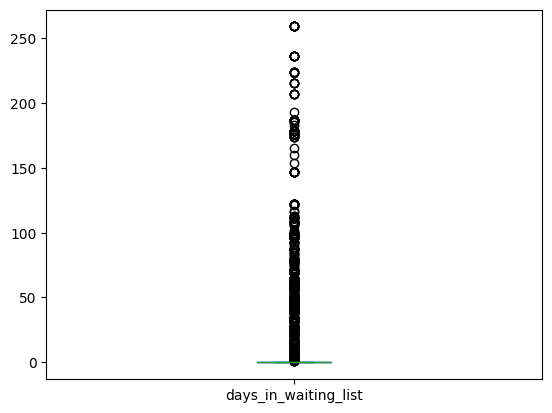

In [65]:
## Plotting box plot to see outliers in the column.
df["days_in_waiting_list"].plot.box()

In [66]:
## Checking quantile value to remove outliers
df["days_in_waiting_list"].quantile(0.92)

0.0

In [67]:
## Applying filter to remove outliers and taking values of days_in_waiting_list<= 0 and saving that data again in df.
df = df[df["days_in_waiting_list"]<=0]

<Axes: >

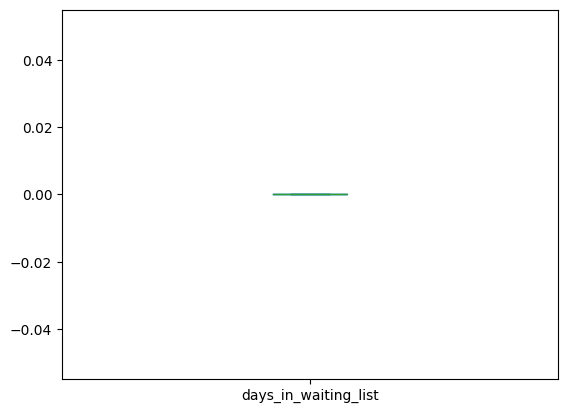

In [68]:
## Plotting box plot after removing outliers.
df["days_in_waiting_list"].plot.box()

In [69]:
## Checking overall shape of the data frame
df.shape

(64940, 30)

In [70]:
## Info prints information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64940 entries, 2 to 119388
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           64940 non-null  object        
 1   is_canceled                     64940 non-null  int64         
 2   lead_time                       64940 non-null  int64         
 3   arrival_date_year               64940 non-null  int64         
 4   arrival_date_month              64940 non-null  object        
 5   arrival_date_week_number        64940 non-null  int64         
 6   arrival_date_day_of_month       64940 non-null  int64         
 7   stays_in_weekend_nights         64940 non-null  int64         
 8   stays_in_week_nights            64940 non-null  int64         
 9   adults                          64940 non-null  int64         
 10  children                        64940 non-null  float64       
 11  babies

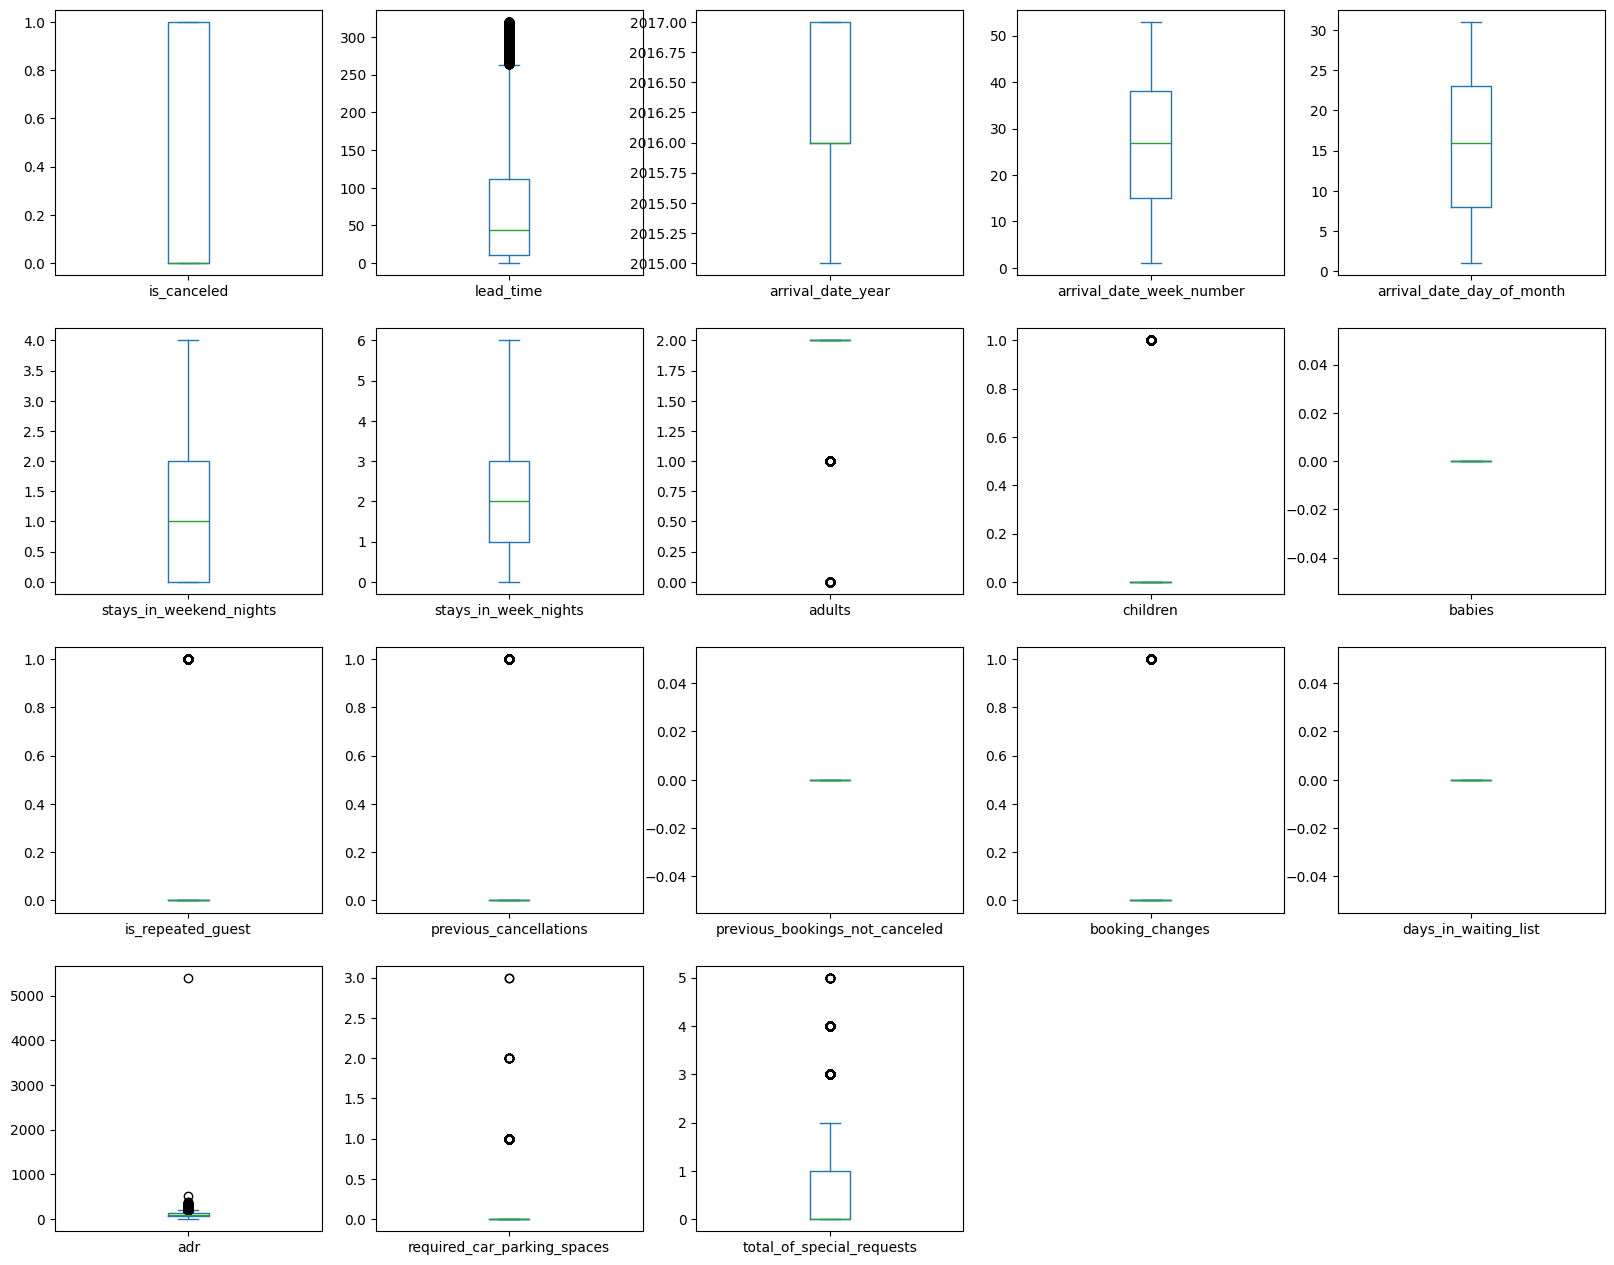

In [71]:
## Plotting box plot of all the column with numeric datatype.
df.plot(kind = "box", subplots=True,layout = (5,5), figsize = (20,20))
plt.show()

In [72]:
## Checking sum of all the null values.
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Data Analysis and Visualizations

In [73]:
## Using value_counts to check count of unique values of is_canceled column
df["is_canceled"].value_counts()

is_canceled
0    47198
1    17742
Name: count, dtype: int64

In [74]:
## Using normalize in value_counts we can directly check the percentage instead of count 
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
cancelled_perc

is_canceled
0    0.726794
1    0.273206
Name: proportion, dtype: float64

* Here we can see that 64% of reservations are not cancelled and 36% of reservations are cancelled

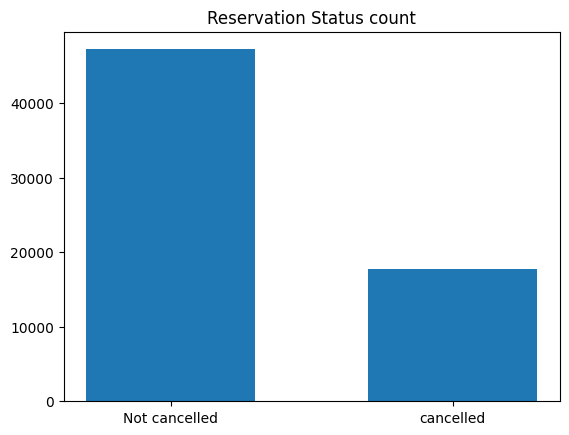

In [75]:
## Plotting bar plot to see the count of output column(is_canceled)
plt.title("Reservation Status count")
plt.bar(['Not cancelled','cancelled'],df['is_canceled'].value_counts(),width=0.6)
plt.show()

* from above bar plot we can see that the not cancelled values are more than cancelled values.

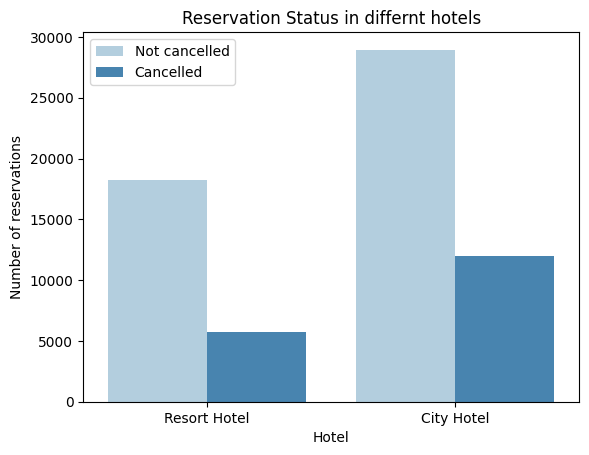

In [76]:
## Plotting countplot to see relation between hotel column and is_canceled column.
sns.countplot(x='hotel',hue = 'is_canceled',data= df , palette="Blues")
plt.title("Reservation Status in differnt hotels")
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.legend(['Not cancelled','Cancelled'])
plt.show()

* from above count plot we can see that in resort hotel count of not_cancelled is more than cancelled,
* whereas in city hotel count of not_cancelled is more than cancelled.

In [77]:
## using value_count to check count of unique values of hotel column.
df['hotel'].value_counts()

hotel
City Hotel      40942
Resort Hotel    23998
Name: count, dtype: int64

In [78]:
## df.columns returns name of all the columns.
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [79]:
df.reset_index(drop = True, inplace =True)

In [80]:
## Checking relation between hotel column and adr column
df.groupby("hotel")["adr"].mean()

hotel
City Hotel      105.234577
Resort Hotel     93.641098
Name: adr, dtype: float64

* from above co-relation we can see that mean of adr of city hotel is greater than resort hotel.

### Applying Hypothesis Testing
* We have to apply hypothesis test to check if the diiference in mean is significant or not.

In [81]:
## using value_count to check count of unique values of hotel column.
df["hotel"].value_counts()

hotel
City Hotel      40942
Resort Hotel    23998
Name: count, dtype: int64

In [82]:
## Splitting data by its index value for city and resort hotel.
city_hotel = df[df["hotel"] == "City Hotel"].index
resort_hotel = df[df["hotel"] == "Resort Hotel"].index

In [83]:
## Displays index value of city hotel data
city_hotel

Index([23998, 23999, 24000, 24001, 24002, 24003, 24004, 24005, 24006, 24007,
       ...
       64930, 64931, 64932, 64933, 64934, 64935, 64936, 64937, 64938, 64939],
      dtype='int64', length=40942)

In [84]:
## Displays index value of resort hotel data
resort_hotel

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       23988, 23989, 23990, 23991, 23992, 23993, 23994, 23995, 23996, 23997],
      dtype='int64', length=23998)

In [85]:
## Picking 1500 random sample data from city and resort hotel 
city_sample = np.random.choice(city_hotel, 1500)
resort_sample = np.random.choice(resort_hotel, 1500)

In [86]:
city_sample = df.iloc[city_sample]["adr"]
resort_sample = df.iloc[resort_sample]["adr"]

In [87]:
## Finding mean and standard deviation of city and resort hotel.
city_mean = city_sample.mean()
city_std = city_sample.std()
resort_mean = resort_sample.mean()
resort_std = resort_sample.std()
city_mean, city_std, resort_mean,resort_std

(104.41303333333335, 34.12020011228965, 93.27045333333332, 58.93620423622766)

In [88]:
## taking sample size - 1500
n = 1500

In [89]:
## Applying T- test for two sample 
p_val = (city_mean - resort_mean)/np.sqrt((city_std**2/n)+ (resort_std**2/n))

In [90]:
p_val

6.336971289263984

* As the p_val is greater than 1.65 , hence it clears that the difference in mean of adr in city and resort hotel is significant.

#### Working on Cancelled Bookings within months

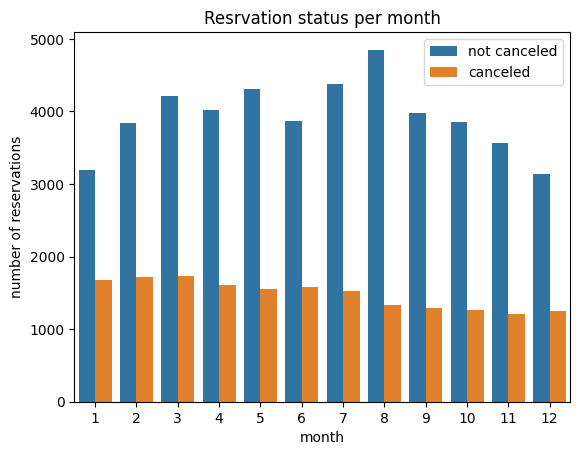

In [91]:
## Plotting countplot to see the count of output column(is_canceled) on monthly basis.
df["month"] = df["reservation_status_date"].dt.month
sns.countplot(x = "month", hue = "is_canceled",data=df)
plt.xlabel("month")
plt.title("Resrvation status per month")
plt.ylabel("number of reservations")
plt.legend(["not canceled","canceled"])
plt.show()

* from above countplot we can see that the count of not canceled is more in every month except "1st" i.e. January

In [92]:
## Applying cross tab to get the count of not_canceled and canceled on the basis of meal.
## Cross tab is use to count the observation present in the categorical variable.
pd.crosstab(df["meal"], df["is_canceled"])

is_canceled,0,1
meal,,
BB,36736,12886
FB,153,71
HB,4403,1644
SC,5647,3083
Undefined,259,58


* from above analysis we can see that majority of not canceled and canceled are in BB meals.

In [93]:
## Applying cross tab to get the count of city hotel and resort hotel on the basis of meal.
pd.crosstab(df["meal"], df["hotel"])

hotel,City Hotel,Resort Hotel
meal,,
BB,30352,19270
FB,6,218
HB,1885,4162
SC,8699,31
Undefined,0,317


* from above analysis we can see that majority of not canceled and canceled are in BB meals.

In [94]:
## Using value_count to check count of unique values of month column.
df["month"].value_counts()

month
8     6176
3     5940
7     5906
5     5869
4     5625
2     5554
6     5461
9     5270
10    5115
1     4862
11    4782
12    4380
Name: count, dtype: int64

In [95]:
## Using value_count to check count of unique values of market_segment column.
df['market_segment'].value_counts()

market_segment
Online TA        40192
Offline TA/TO    10488
Direct            8431
Groups            3188
Corporate         2092
Complementary      406
Aviation           143
Name: count, dtype: int64

* from above we can see that count of Online TA is highest than any other market segment.

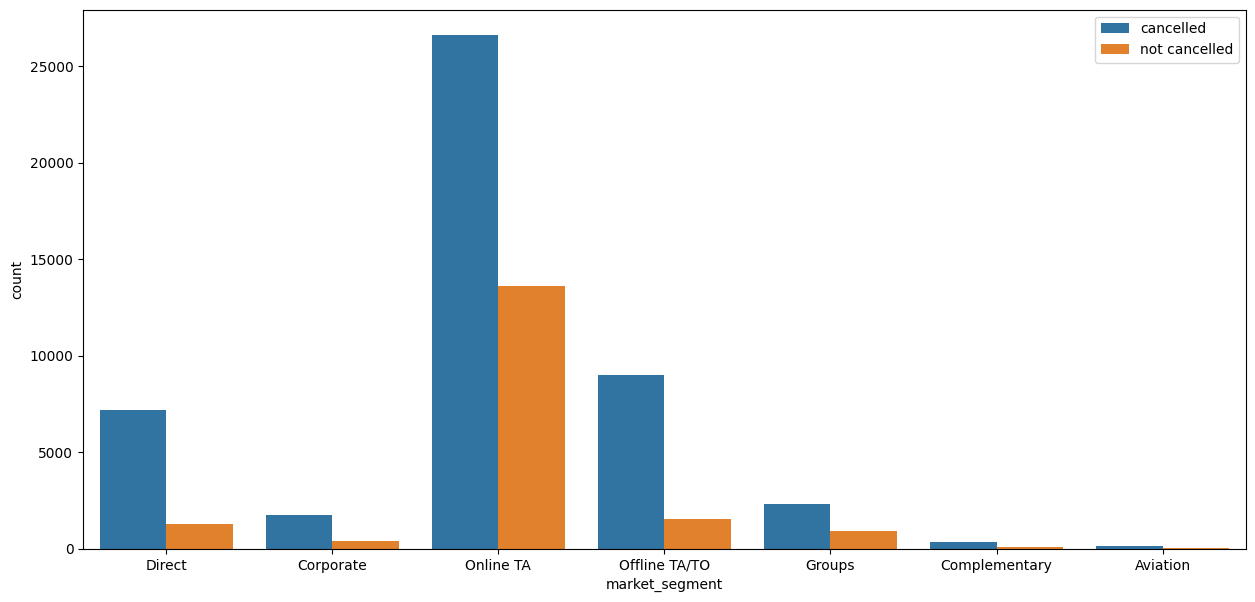

In [96]:
## Plotting countplot to see the count of output column(is_canceled) on the basis of market_segment
plt.figure(figsize=(15,7))
sns.countplot(df, x="market_segment",hue='is_canceled')
plt.legend(['cancelled','not cancelled'])
plt.show()

* from above analysis we can see that count of canceled and not_canceled is more in Online TA.

In [97]:
## Returns top 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-03-07,3


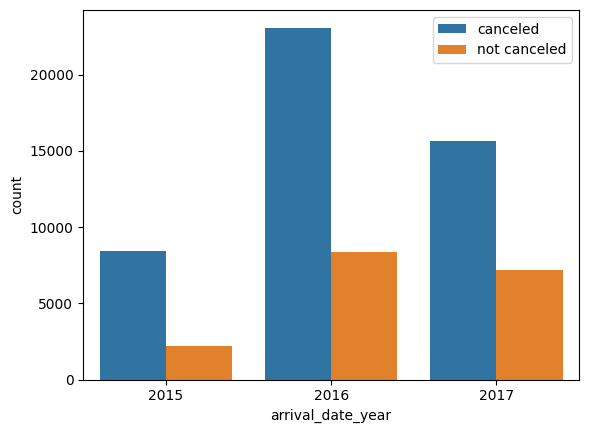

In [98]:
## Plotting countplot to see the count of output column(is_canceled) on the basis of arrival_date_year
sns.countplot(df, x="arrival_date_year",hue="is_canceled")
plt.legend(['canceled','not canceled'])
plt.show()

* from above analysis we can see that count of not_canceled is more every year and among all the years the highest count of canceled and not canceled is in year 2016.

In [99]:
## Using value_count to check count of unique values of arrival_date_month.
df["arrival_date_year"].value_counts()

arrival_date_year
2016    31453
2017    22862
2015    10625
Name: count, dtype: int64

In [100]:
## Checking percantage using normalize 
df["arrival_date_year"].value_counts(normalize=True)

arrival_date_year
2016    0.484339
2017    0.352048
2015    0.163613
Name: proportion, dtype: float64

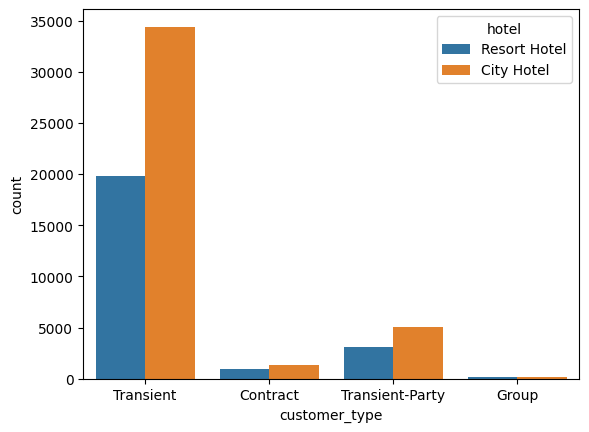

In [101]:
## Plotting countplot of customer_type and hotel
sns.countplot(df,x="customer_type",hue="hotel")
plt.show()

 * from above analysis we can see that count of city_hotel is more in each customer_type and highest count is for transient customer_type.

In [102]:
## Using value_count to check count of unique values of arrival_date_month.
df["customer_type"].value_counts()

customer_type
Transient          54191
Transient-Party     8175
Contract            2270
Group                304
Name: count, dtype: int64

In [103]:
## Checking percantage using normalize 
df["customer_type"].value_counts(normalize=True)

customer_type
Transient          0.834478
Transient-Party    0.125885
Contract           0.034955
Group              0.004681
Name: proportion, dtype: float64

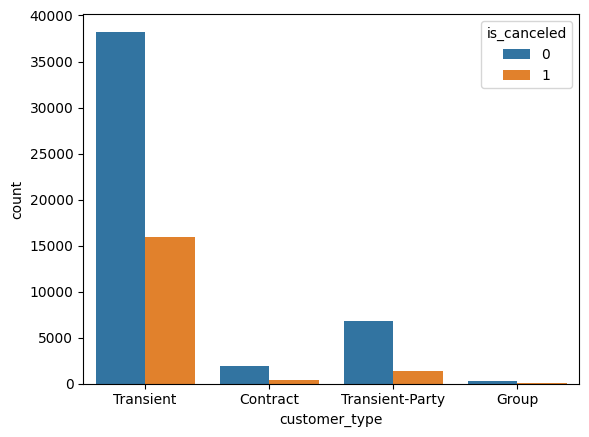

In [104]:
## Plotting countplot for customer_type and is_canceled
sns.countplot(df,x="customer_type",hue="is_canceled")
plt.show()

 * From above analysis we can see that count of not_canceled is more in each customer_type and highest count is for transient customer_type.

In [105]:
## Using crosstab to compare the results for reservation_status_date with the reservation_status
pd.crosstab(df["reservation_status_date"],df["reservation_status"])

reservation_status,Canceled,Check-Out,No-Show
reservation_status_date,,,
2014-10-17,8,0,0
2014-11-18,1,0,0
2015-01-01,24,0,0
2015-01-05,5,0,0
2015-01-06,11,0,0
...,...,...,...
2017-12-04,15,63,2
2017-12-05,44,71,1
2017-12-06,17,68,2


In [106]:
## df.columns returns all the columns in tha dataframe
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [107]:
## Returns information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           64940 non-null  object        
 1   is_canceled                     64940 non-null  int64         
 2   lead_time                       64940 non-null  int64         
 3   arrival_date_year               64940 non-null  int64         
 4   arrival_date_month              64940 non-null  object        
 5   arrival_date_week_number        64940 non-null  int64         
 6   arrival_date_day_of_month       64940 non-null  int64         
 7   stays_in_weekend_nights         64940 non-null  int64         
 8   stays_in_week_nights            64940 non-null  int64         
 9   adults                          64940 non-null  int64         
 10  children                        64940 non-null  float64       
 11  ba

In [108]:
## Returns top 5 rows of the data frame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-03-07,3


In [109]:
## Using value_count to check count of unique values of deposit_type
df["deposit_type"].value_counts()

deposit_type
No Deposit    64301
Non Refund      573
Refundable       66
Name: count, dtype: int64

In [110]:
## Dropping deposit type column, because data was too biased towards No_deposit.
df.drop(["deposit_type"],axis=1,inplace=True)

In [111]:
## Dropping columns days_in_waiting_list, required_car_parking_spaces, total_of_special_requests as these columns are biased.
df.drop(["days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"],axis=1,inplace=True)

In [112]:
## Returns top 5 rows of the data frame
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,adr,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,A,C,0,Transient,75.0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,A,A,0,Transient,75.0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,A,A,0,Transient,98.0,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,C,C,0,Transient,107.0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,0,C,C,0,Transient,103.0,Check-Out,2015-03-07,3


In [113]:
## Using value_count to check count of unique values of assigned_room_type column.
df["assigned_room_type"].value_counts()

assigned_room_type
A    38690
D    15718
E     5054
F     1717
B     1309
C     1085
G      782
I      225
K      199
H      160
P        1
Name: count, dtype: int64

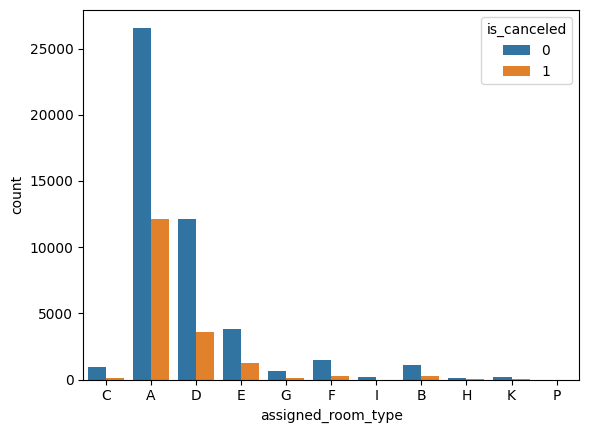

In [114]:
## Plotting countplot for assigned room type and is_canceled
sns.countplot(df,x="assigned_room_type",hue="is_canceled")
plt.show()

* From above analysis we can see that count of not_canceled is more in each assigned_room_type and highest count is for A,D,E category of room types.

In [115]:
## Dropping assigned room type because there is no relation with target column
df.drop(["assigned_room_type"],axis=1,inplace=True)

In [116]:
## Using value_count to check count of unique values of previous_cancellations.
df["previous_cancellations"].value_counts()

previous_cancellations
0    64147
1      793
Name: count, dtype: int64

In [117]:
## Using value_count to check count of unique values of previous_cancellations.
df["previous_bookings_not_canceled"].value_counts()

previous_bookings_not_canceled
0    64940
Name: count, dtype: int64

<Axes: xlabel='previous_cancellations', ylabel='count'>

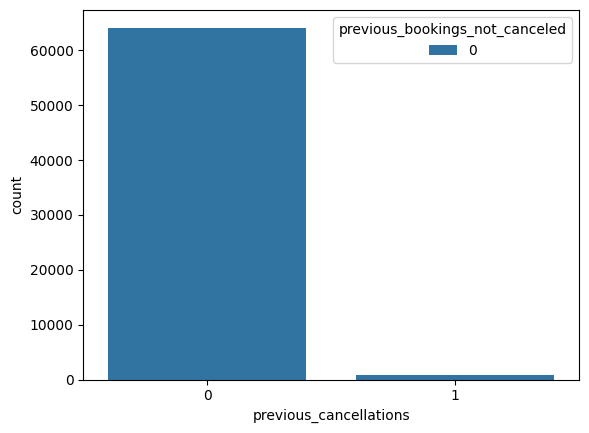

In [118]:
## Plotting count plot for previous cancellations and previous_bookings_not_canceled
sns.countplot(df,x="previous_cancellations",hue="previous_bookings_not_canceled")

* From above analysis we can see that the data is fully biased towards not canceled while comparing previous_cancellations and previous_bookings_not_canceled.

In [119]:
## Dropping column previous_cancellations, previous_bookings_not_canceled because 
## it is too biased and there is no relation with target column.
df.drop(["previous_cancellations","previous_bookings_not_canceled"],axis=1,inplace=True)


In [120]:
## Info gives information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      64940 non-null  object        
 1   is_canceled                64940 non-null  int64         
 2   lead_time                  64940 non-null  int64         
 3   arrival_date_year          64940 non-null  int64         
 4   arrival_date_month         64940 non-null  object        
 5   arrival_date_week_number   64940 non-null  int64         
 6   arrival_date_day_of_month  64940 non-null  int64         
 7   stays_in_weekend_nights    64940 non-null  int64         
 8   stays_in_week_nights       64940 non-null  int64         
 9   adults                     64940 non-null  int64         
 10  children                   64940 non-null  float64       
 11  babies                     64940 non-null  int64         
 12  meal

In [121]:
## Using value_count to check count of unique values of booking changes.
df["booking_changes"].value_counts()

booking_changes
0    57103
1     7837
Name: count, dtype: int64

In [122]:
## Using value_count to check count of unique values of distribution_channel.
df["distribution_channel"].value_counts()

distribution_channel
TA/TO        52969
Direct        9171
Corporate     2626
GDS            173
Undefined        1
Name: count, dtype: int64

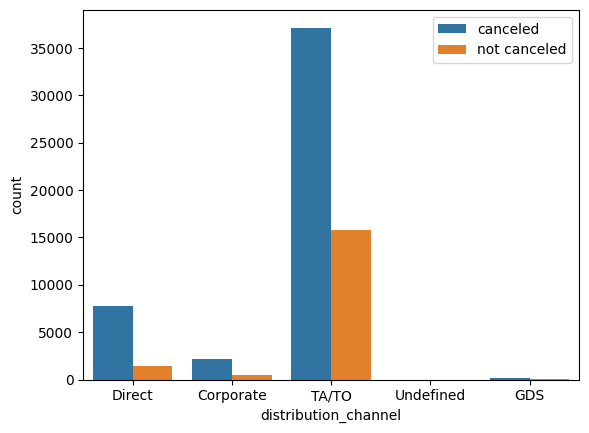

In [123]:
## Plotting countplot for distribution_channel and is_canceled.
## Legend -> describes the elements of a graph
sns.countplot(df,x="distribution_channel",hue="is_canceled")
plt.legend(['canceled','not canceled'])

* From above analysis we can see that for TA/TO the count of canceled and not_canceled is highest than any other distribution_channel and for undefined there none of the data can be seen.

In [124]:
## Using crosstab to compare the results for distribution_channel with the is_canceled column.
pd.crosstab(df["distribution_channel"], df["is_canceled"])

is_canceled,0,1
distribution_channel,,
Corporate,2154,472
Direct,7746,1425
GDS,141,32
TA/TO,37156,15813
Undefined,1,0


In [125]:
## Returns top 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,customer_type,adr,reservation_status,reservation_status_date,month
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Direct,Direct,0,A,0,Transient,75.0,Check-Out,2015-02-07,2
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Corporate,Corporate,0,A,0,Transient,75.0,Check-Out,2015-02-07,2
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Online TA,TA/TO,0,A,0,Transient,98.0,Check-Out,2015-03-07,3
3,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Direct,Direct,0,C,0,Transient,107.0,Check-Out,2015-03-07,3
4,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Direct,Direct,0,C,0,Transient,103.0,Check-Out,2015-03-07,3


In [126]:
## Checking value_counts for top 10 lead time.
df["lead_time"].value_counts().head(10)

lead_time
0     4593
1     2422
2     1459
3     1306
4     1176
5     1074
6      978
7      926
8      812
11     728
Name: count, dtype: int64

In [127]:
## Using crosstab to compare the results for is_canceled with the lead_time column.
pd.crosstab(df["is_canceled"],df["lead_time"])

lead_time,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,320
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,4302,2247,1310,1162,1057,940,842,796,668,564,...,7,9,9,4,9,18,11,13,7,24
1,291,175,149,144,119,134,136,130,144,136,...,8,15,15,10,14,11,10,5,17,20


<Axes: xlabel='is_canceled', ylabel='lead_time'>

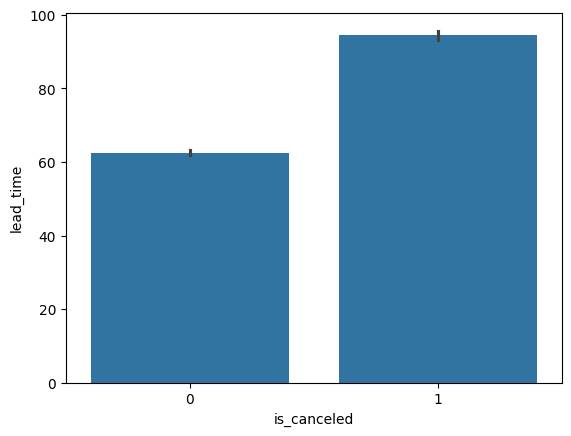

In [128]:
## Plotting bar plot for is_canceled(target column) and lead time column to find the relation between them.
sns.barplot(x = df["is_canceled"],y = df["lead_time"])

* From the above barplot we can analyse that count of lead time in not canceled is less than count of lead time in canceled.

In [129]:
## Gives information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      64940 non-null  object        
 1   is_canceled                64940 non-null  int64         
 2   lead_time                  64940 non-null  int64         
 3   arrival_date_year          64940 non-null  int64         
 4   arrival_date_month         64940 non-null  object        
 5   arrival_date_week_number   64940 non-null  int64         
 6   arrival_date_day_of_month  64940 non-null  int64         
 7   stays_in_weekend_nights    64940 non-null  int64         
 8   stays_in_week_nights       64940 non-null  int64         
 9   adults                     64940 non-null  int64         
 10  children                   64940 non-null  float64       
 11  babies                     64940 non-null  int64         
 12  meal

In [130]:
## Returns all the unique values from hotel Column.
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [131]:
## Returns all the unique values from children Column.
df["children"].unique()

array([0., 1.])

In [132]:
## Returns all the unique values from adults Column.
df["adults"].unique()

array([1, 2, 0], dtype=int64)

In [133]:
## Checking value_counts for adults column.
df["adults"].value_counts()

adults
2    52927
1    11918
0       95
Name: count, dtype: int64

In [134]:
## Using crosstab to compare the results for is_canceled with stays_in_weekend_nights column.
pd.crosstab(df["is_canceled"], df["stays_in_weekend_nights"])

stays_in_weekend_nights,0,1,2,3,4
is_canceled,,,,,
0,19871,12841,14015,255,216
1,6699,4882,5907,153,101


In [135]:
## Using crosstab to compare the results for is_canceled with stays_in_week_nights column.
pd.crosstab(df["is_canceled"], df["stays_in_week_nights"])

stays_in_week_nights,0,1,2,3,4,5,6
is_canceled,,,,,,,
0,3974,13110,11502,8772,3997,5197,646
1,957,3834,4644,3708,1918,2297,384


In [136]:
## Checking value_counts for adults column.
df["children"].value_counts()

children
0.0    61392
1.0     3548
Name: count, dtype: int64

In [137]:
## Using crosstab to compare the results for is_canceled with children column.
pd.crosstab(df["is_canceled"], df["children"])

children,0.0,1.0
is_canceled,,
0,44751,2447
1,16641,1101


In [138]:
## Checking value_counts for country column.
df["country"].value_counts()

country
PRT    19555
GBR     7580
FRA     7027
ESP     5675
DEU     4300
       ...  
MMR        1
COM        1
BFA        1
SMR        1
UMI        1
Name: count, Length: 170, dtype: int64

In [139]:
## Checking value_counts for market segment column.
df["market_segment"].value_counts()

market_segment
Online TA        40192
Offline TA/TO    10488
Direct            8431
Groups            3188
Corporate         2092
Complementary      406
Aviation           143
Name: count, dtype: int64

In [140]:
## Using crosstab to compare the results for is_canceled with market segment.
pd.crosstab(df["is_canceled"], df["market_segment"])

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
is_canceled,,,,,,,
0,111,345,1724,7157,2284,8980,26597
1,32,61,368,1274,904,1508,13595


In [141]:
## Replacing Aviation with Other 
df["market_segment"].replace("Aviation", "Other", inplace=True)

In [142]:
## Checking value_counts for market segment column.
df["market_segment"].value_counts()

market_segment
Online TA        40192
Offline TA/TO    10488
Direct            8431
Groups            3188
Corporate         2092
Complementary      406
Other              143
Name: count, dtype: int64

In [143]:
## Creating a list of top 3 market segment 
top_market_seg = df["market_segment"].value_counts().head(3).index.tolist()

In [144]:
## Here we getting top three market segment
top_market_seg

['Online TA', 'Offline TA/TO', 'Direct']

In [145]:
## Using Lambda function to create a list with top 3 market segment and other segment to be added in Other
df["market_segment"]=list(map(lambda x: "Other" if x not in top_market_seg else x, df["market_segment"]))

In [146]:
## Checking value_counts for market segment column.
df["market_segment"].value_counts()

market_segment
Online TA        40192
Offline TA/TO    10488
Direct            8431
Other             5829
Name: count, dtype: int64

* Here we can see that we can only see top three market segment and rest of the market segment category are added in other.

In [147]:
## Using crosstab to compare the results for is_canceled with market segment.
pd.crosstab(df["is_canceled"], df["market_segment"])

market_segment,Direct,Offline TA/TO,Online TA,Other
is_canceled,,,,
0,7157,8980,26597,4464
1,1274,1508,13595,1365


In [148]:
## Checking value_counts for is_repeated_guest column.
df["is_repeated_guest"].value_counts() 

is_repeated_guest
0    64417
1      523
Name: count, dtype: int64

In [149]:
## Using crosstab to compare the results for is_canceled with is_repeated_guest column.
pd.crosstab(df["is_canceled"], df["is_repeated_guest"])

is_repeated_guest,0,1
is_canceled,,
0,46776,422
1,17641,101


In [150]:
## Returns information about the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      64940 non-null  object        
 1   is_canceled                64940 non-null  int64         
 2   lead_time                  64940 non-null  int64         
 3   arrival_date_year          64940 non-null  int64         
 4   arrival_date_month         64940 non-null  object        
 5   arrival_date_week_number   64940 non-null  int64         
 6   arrival_date_day_of_month  64940 non-null  int64         
 7   stays_in_weekend_nights    64940 non-null  int64         
 8   stays_in_week_nights       64940 non-null  int64         
 9   adults                     64940 non-null  int64         
 10  children                   64940 non-null  float64       
 11  babies                     64940 non-null  int64         
 12  meal

In [151]:
## Checking value_counts for reserved_room_type column.
df["reserved_room_type"].value_counts()

reserved_room_type
A    46225
D    11946
E     4258
F     1074
B      623
G      501
C      228
H       80
L        4
P        1
Name: count, dtype: int64

In [152]:
## Using crosstab to compare the results for is_canceled with reserved_room_type column.
pd.crosstab(df["is_canceled"], df["reserved_room_type"])

reserved_room_type,A,B,C,D,E,F,G,H,L,P
is_canceled,,,,,,,,,,
0,33724,446,169,8494,3041,874,395,52,3,0
1,12501,177,59,3452,1217,200,106,28,1,1


In [153]:
## Checking value_counts for booking changes column.
df["booking_changes"].value_counts()

booking_changes
0    57103
1     7837
Name: count, dtype: int64

In [154]:
## Checking value_counts for booking changes column.
df["customer_type"].value_counts()

customer_type
Transient          54191
Transient-Party     8175
Contract            2270
Group                304
Name: count, dtype: int64

In [155]:
## Using crosstab to compare the results for is_canceled with customer type column.
pd.crosstab(df["is_canceled"], df["customer_type"])

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,1876,277,38235,6810
1,394,27,15956,1365


In [156]:
## Checking value_counts for adr column.
df["adr"].value_counts()

adr
0.00      1218
75.00     1062
85.00      747
48.00      726
65.00      696
          ... 
130.17       1
116.60       1
104.43       1
103.15       1
157.71       1
Name: count, Length: 6714, dtype: int64

In [157]:
## Checking value_counts for reservation_status column.
df["reservation_status"].value_counts()

reservation_status
Check-Out    47198
Canceled     16979
No-Show        763
Name: count, dtype: int64

In [158]:
## The describe() function gives the descriptive statistics of a dataset.
df["month"].describe()

count    64940.000000
mean         6.358069
std          3.332137
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64

In [159]:
## Returns information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      64940 non-null  object        
 1   is_canceled                64940 non-null  int64         
 2   lead_time                  64940 non-null  int64         
 3   arrival_date_year          64940 non-null  int64         
 4   arrival_date_month         64940 non-null  object        
 5   arrival_date_week_number   64940 non-null  int64         
 6   arrival_date_day_of_month  64940 non-null  int64         
 7   stays_in_weekend_nights    64940 non-null  int64         
 8   stays_in_week_nights       64940 non-null  int64         
 9   adults                     64940 non-null  int64         
 10  children                   64940 non-null  float64       
 11  babies                     64940 non-null  int64         
 12  meal

In [160]:
### Dropping Columns which do not have any relation with target column. 
df.drop(["arrival_date_week_number", "arrival_date_day_of_month","babies","children", "meal", "country", 
                  "distribution_channel","is_repeated_guest", "booking_changes","adr","reservation_status_date"], axis=1, inplace=True)

In [161]:
## Returns information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    64940 non-null  object
 1   is_canceled              64940 non-null  int64 
 2   lead_time                64940 non-null  int64 
 3   arrival_date_year        64940 non-null  int64 
 4   arrival_date_month       64940 non-null  object
 5   stays_in_weekend_nights  64940 non-null  int64 
 6   stays_in_week_nights     64940 non-null  int64 
 7   adults                   64940 non-null  int64 
 8   market_segment           64940 non-null  object
 9   reserved_room_type       64940 non-null  object
 10  customer_type            64940 non-null  object
 11  reservation_status       64940 non-null  object
 12  month                    64940 non-null  int32 
dtypes: int32(1), int64(6), object(6)
memory usage: 6.2+ MB


In [162]:
## Checking value_counts for hotel column.
df["hotel"].value_counts()

hotel
City Hotel      40942
Resort Hotel    23998
Name: count, dtype: int64

In [163]:
## Converting city hotel to 0 and resort hotel to 1 
df["hotel"]=list(map(lambda x: 0 if x == "City Hotel" else 1, df["hotel"]))

In [164]:
##Rreturns unique values from the hotel column 
df["hotel"].unique()

array([1, 0], dtype=int64)

In [165]:
## Returns unique values from the arrival_date_month column 
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [166]:
## Reset index is use to reset the index of the dataframe.
## Drop = True is set to true so that the replaced index column is not added to the data.
## Inplace = True is set to true so that the changes are made directly to the original DataFrame.
df.reset_index(drop=True, inplace=True)

In [167]:
## Returns information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    64940 non-null  int64 
 1   is_canceled              64940 non-null  int64 
 2   lead_time                64940 non-null  int64 
 3   arrival_date_year        64940 non-null  int64 
 4   arrival_date_month       64940 non-null  object
 5   stays_in_weekend_nights  64940 non-null  int64 
 6   stays_in_week_nights     64940 non-null  int64 
 7   adults                   64940 non-null  int64 
 8   market_segment           64940 non-null  object
 9   reserved_room_type       64940 non-null  object
 10  customer_type            64940 non-null  object
 11  reservation_status       64940 non-null  object
 12  month                    64940 non-null  int32 
dtypes: int32(1), int64(7), object(5)
memory usage: 6.2+ MB


In [168]:
## Using map function to convert object type of data to integer, giving jan ->1 , feb-> 2...vice versa..
df["arrival_date_month"] = df["arrival_date_month"].map({"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
                                                                   "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12})

In [169]:
## Returns unique value after converting values into integer datatype.
df["arrival_date_month"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [170]:
## Returns information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    64940 non-null  int64 
 1   is_canceled              64940 non-null  int64 
 2   lead_time                64940 non-null  int64 
 3   arrival_date_year        64940 non-null  int64 
 4   arrival_date_month       64940 non-null  int64 
 5   stays_in_weekend_nights  64940 non-null  int64 
 6   stays_in_week_nights     64940 non-null  int64 
 7   adults                   64940 non-null  int64 
 8   market_segment           64940 non-null  object
 9   reserved_room_type       64940 non-null  object
 10  customer_type            64940 non-null  object
 11  reservation_status       64940 non-null  object
 12  month                    64940 non-null  int32 
dtypes: int32(1), int64(8), object(4)
memory usage: 6.2+ MB


In [171]:
## Returns unique values of the column market segment
df["market_segment"].unique()

array(['Direct', 'Other', 'Online TA', 'Offline TA/TO'], dtype=object)

In [172]:
## Converting values of market_segment to integer datatype using map function.
df["market_segment"] = df["market_segment"].map({"Online TA": 1, "Offline TA/TO": 2,"Direct": 3,"Other": 4})

In [173]:
## Returns unique value after converting values into integer datatype.
df["market_segment"].unique()

array([3, 4, 1, 2], dtype=int64)

In [174]:
## Returns unique values of the reserved_room_type column.
df["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [175]:
## Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [176]:
## Creating a variable le to inherit functions of labelencoder
le = LabelEncoder()

In [177]:
## Fitting and tranforming data into label encoder
df["reserved_room_type"] = le.fit_transform(df["reserved_room_type"])

In [178]:
## Returns unique values of the column reserved room type after converting the data using label encoder
df["reserved_room_type"].unique()

array([0, 2, 3, 4, 6, 5, 7, 8, 1, 9])

In [179]:
## Returns data type of column reserved room type
df["reserved_room_type"].dtype

dtype('int32')

In [180]:
## Returns unique values of the column customer type
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [181]:
## Using map function to convert data into integer datatype, giving transient -> 0, contract->1 ..,vice versa..
df['customer_type'] = df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [182]:
## Returns unique value of the column customer type
df["customer_type"].unique()

array([0, 1, 2, 3], dtype=int64)

In [183]:
## Returns unique value of the column reservation status type
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [184]:
## Using map function to convert data into integer datatype, giving check_out ->1.. vice-versa.,
df["reservation_status"] = df["reservation_status"].map({"Check-Out": 1, "Canceled": 2, "No-Show": 0 })

In [185]:
## Returns unique value of the column reservation status type after converting into integer data type
df["reservation_status"].unique()

array([1, 2, 0], dtype=int64)

In [186]:
## Checking value_counts for reservation status column.
df["reservation_status"].value_counts()

reservation_status
1    47198
2    16979
0      763
Name: count, dtype: int64

In [187]:
## Returns information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64940 entries, 0 to 64939
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   hotel                    64940 non-null  int64
 1   is_canceled              64940 non-null  int64
 2   lead_time                64940 non-null  int64
 3   arrival_date_year        64940 non-null  int64
 4   arrival_date_month       64940 non-null  int64
 5   stays_in_weekend_nights  64940 non-null  int64
 6   stays_in_week_nights     64940 non-null  int64
 7   adults                   64940 non-null  int64
 8   market_segment           64940 non-null  int64
 9   reserved_room_type       64940 non-null  int32
 10  customer_type            64940 non-null  int64
 11  reservation_status       64940 non-null  int64
 12  month                    64940 non-null  int32
dtypes: int32(2), int64(11)
memory usage: 5.9 MB


In [188]:
df.isna().sum()

hotel                      0
is_canceled                0
lead_time                  0
arrival_date_year          0
arrival_date_month         0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
market_segment             0
reserved_room_type         0
customer_type              0
reservation_status         0
month                      0
dtype: int64

In [189]:
## Splitting input and output data as X and y resp.
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

In [190]:
## Checking shape of the input columns
X.shape

(64940, 12)

In [191]:
## Checking shape of the output column
y.shape

(64940,)

## Working on dataset with PCA -> Principal component analysis

In [192]:
## Importing PCA 
from sklearn.decomposition import PCA

In [193]:
## Using algorithem PCA, Taking n components as 6
pc = PCA(n_components=6)

In [194]:
# Fitting and transforming the model
new_data =pc.fit_transform(X) 

In [195]:
new_data

array([[-64.31482034,   2.63200037,  -3.50748717,  -1.49651611,
          0.55166486,   1.2189828 ],
       [-58.31616214,   2.63851779,  -3.49421078,  -1.56254642,
          0.70214102,   2.12486649],
       [-57.30460679,   1.92106668,  -2.84154302,  -0.89799385,
         -0.4858694 ,  -0.56374174],
       ...,
       [-48.27246   ,  -0.81696043,  -1.41676477,   0.66787391,
         -3.14369666,   0.32736175],
       [-37.27117326,  -1.51692278,  -0.80021215,   3.27938506,
         -1.69630945,  -0.59415072],
       [ 37.72592509,  -1.33277763,  -0.55313322,   0.41691246,
         -2.70469669,  -0.56261943]])

In [196]:
# Return components(eigen vectors)
pc.components_ 

array([[ 4.02702903e-05,  9.99963022e-01,  1.24827950e-03,
         3.52997465e-03,  2.78993788e-03,  6.89917821e-03,
         8.88088194e-04, -1.11992619e-03,  4.27635948e-05,
         9.07306332e-04,  1.21888845e-03,  4.45282148e-04],
       [-1.96288676e-03,  2.57841977e-03,  7.88930338e-02,
        -6.60527755e-01, -3.54234038e-03, -1.62437506e-03,
         1.24994893e-03, -8.95310042e-03,  3.07877676e-03,
        -8.05845240e-03,  3.66115666e-03, -7.46514396e-01],
       [-3.60378242e-03,  2.30405420e-03,  9.25180186e-02,
        -7.40559083e-01,  3.69164532e-04, -1.30114183e-02,
        -3.20363899e-03, -5.47934154e-04, -2.47582903e-02,
         4.80448452e-04, -7.91593523e-03,  6.64934961e-01],
       [ 9.40325394e-02, -3.66499186e-03,  9.36612146e-03,
        -1.84928019e-02,  1.29618903e-01,  4.72295298e-01,
         4.36136893e-02, -4.40403617e-02,  8.62532739e-01,
        -5.10507265e-02,  5.71737691e-03,  2.01874835e-02],
       [-5.48945883e-04,  6.37996369e-03,  2.2632944

### Train Test Split

In [197]:
## Importing train test split
from sklearn.model_selection import train_test_split

In [198]:
## Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(new_data, y, train_size=0.75, random_state=34)

In [199]:
## Checking shape of train input data
X_train.shape

(48705, 6)

In [200]:
## Checking shape of train output data
y_train.shape

(48705,)

* As the numeric values has lot of difference , hence we have to apply StandardScaler.

In [201]:
## Importing Standard scaler
from sklearn.preprocessing import StandardScaler

In [202]:
## Applying standard scaler because data has numeric values which has significant diffrence.
scaler = StandardScaler()

In [203]:
## Scaling input train data using scaler function
X_train = scaler.fit_transform(X_train)

In [204]:
## Scaling input testing data using scaler function
## We only transform the test data 
X_test = scaler.transform(X_test)

In [205]:
## Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [206]:
## Creating model for LogisticRegression
model = LogisticRegression()

In [207]:
## Fitting values in model
model.fit(X_train, y_train)

LogisticRegression()

In [208]:
## Checking model score/ training accuracy
model.score(X_train, y_train)

0.7344625808438559

In [209]:
## Importing accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [210]:
## Predicting values 
y_pred = model.predict(X_test)

In [211]:
## Checking testing accuracy
accuracy_score(y_pred, y_test)

0.7365568216815522

In [212]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     15471
           1       0.10      0.59      0.18       764

    accuracy                           0.74     16235
   macro avg       0.54      0.67      0.51     16235
weighted avg       0.93      0.74      0.81     16235



In [213]:
cnf_pred=confusion_matrix(y_pred, y_test)
cnf_pred

array([[11504,  3967],
       [  310,   454]], dtype=int64)

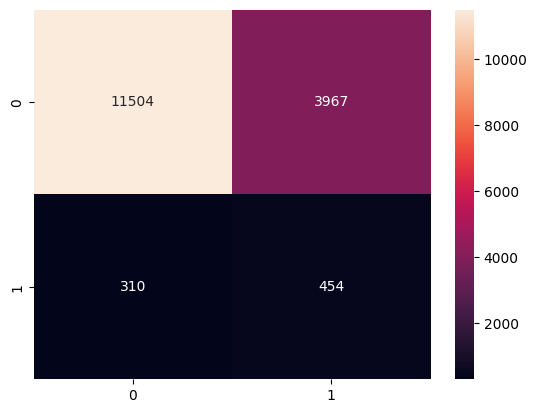

In [214]:
sns.heatmap(cnf_pred, annot=True, fmt="d")
plt.show()

### Decision Tree Classifier

In [215]:
## Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [216]:
## Creating a model for DecisionTreeClassifier to inherit properties of it.
model1 = DecisionTreeClassifier()

In [217]:
## Fitting training input and output data in the model.
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [218]:
## Checking model score by giving X_train and y_train
model1.score(X_train,y_train)

1.0

In [219]:
## Predicting values
y_pred1= model1.predict(X_test)

In [220]:
## Checking accuracy score by giving 
accuracy_score(y_pred1, y_test)

0.8165075454265476

In [221]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     15471
           1       0.10      0.59      0.18       764

    accuracy                           0.74     16235
   macro avg       0.54      0.67      0.51     16235
weighted avg       0.93      0.74      0.81     16235



In [222]:
cnf_pred1=confusion_matrix(y_pred1, y_test)
cnf_pred1

array([[10402,  1567],
       [ 1412,  2854]], dtype=int64)

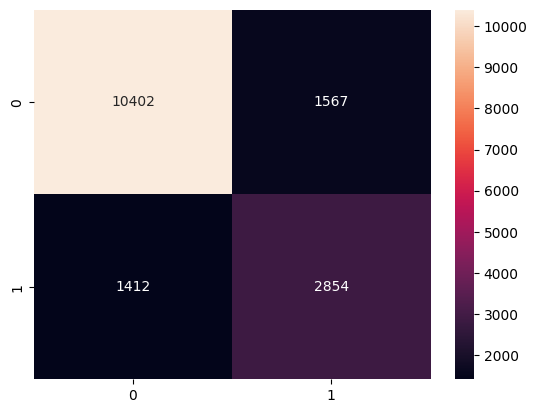

In [223]:
sns.heatmap(cnf_pred1, annot=True, fmt="d")
plt.show()

### DecisionTreeClassifier with criterion = "entropy"

In [224]:
## creating  DecisionTreeClassifier model on the basis of criterion="entropy", max_depth=4, max_features=4
model3 = DecisionTreeClassifier(criterion="entropy", max_depth=4, max_features=4)

In [225]:
## Fitting the model by giving X_train and y_train.
model3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4)

In [226]:
## Checking score of the model.
model3.score(X_train, y_train)

0.7907607021866339

In [227]:
## Predicting values
y_pred3 = model3.predict(X_test)

In [228]:
## Checking Accuracy Score
accuracy_score(y_pred3, y_test)

0.7926701570680629

In [229]:
cnf_pred3=confusion_matrix(y_pred3, y_test)
cnf_pred3

array([[11273,  2825],
       [  541,  1596]], dtype=int64)

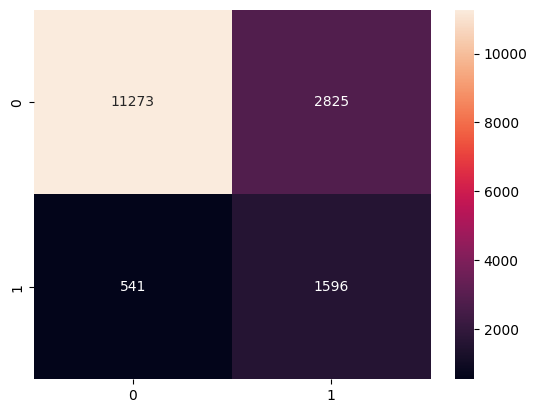

In [230]:
sns.heatmap(cnf_pred3, annot=True, fmt="d")
plt.show()

### Using Random Forest

In [231]:
## Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [232]:
## Creating RandomForestClassifier model on the basis of n_estimators=100, n_jobs=-1,criterion="entropy"
model4 = RandomForestClassifier(n_estimators=100, n_jobs=-1,criterion="entropy")

In [233]:
## Fitting data into the model by giving X_tain and y_train.
model4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

In [234]:
## Checking model score
model4.score(X_train, y_train)

0.9999589364541628

In [235]:
## Predicting values.
y_pred4 = model4.predict(X_test)

In [236]:
## Checking accuracy score
accuracy_score(y_pred4, y_test)

0.8676316599938405

In [237]:
cnf_pred4=confusion_matrix(y_pred4, y_test)
cnf_pred4

array([[11177,  1512],
       [  637,  2909]], dtype=int64)

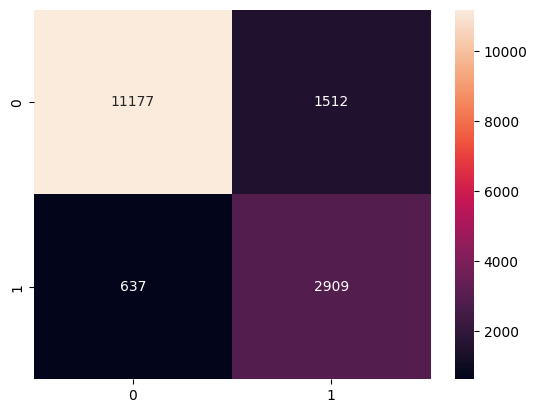

In [238]:
sns.heatmap(cnf_pred4, annot=True, fmt="d")
plt.show()

## Conclusion
* Applied PCA on the dataset and applied different alogorithms.
* among them the best accuracy we found is in RandomForestClassifier.

## Working on dataset without PCA

### Train Test split

In [239]:
## Performing train test split on data set without PCA
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=34)

In [240]:
## Scaling input train data using scaler function
X_tr = scaler.fit_transform(X_tr)

In [241]:
## Scaling input test data using scaler function
X_te = scaler.transform(X_te)

### Logistic Regression

In [242]:
## Creating model for LogisticRegression
lr = LogisticRegression()

In [243]:
## fitting data into model by giving X_train & y_train
lr.fit(X_tr, y_tr)

LogisticRegression()

In [244]:
## Checking model score
lr.score(X_tr, y_tr)

0.9877219997946822

In [245]:
## Predicting values
y_lr = lr.predict(X_te)

In [246]:
## Checking accuracy score
accuracy_score(y_lr, y_te)

0.9898367724052972

In [247]:
cnf_lr=confusion_matrix(y_lr, y_te)
cnf_lr

array([[11814,   165],
       [    0,  4256]], dtype=int64)

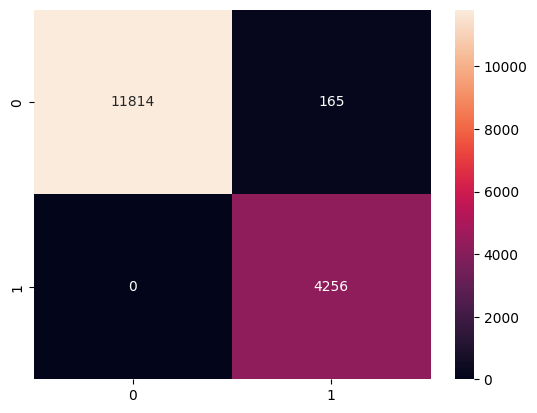

In [248]:
sns.heatmap(cnf_lr,annot=True,fmt="d")
plt.show()

### Decision Tree Classifier

In [249]:
## Creating a model for DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [250]:
## fitting data into the model by giving x_train and y_train
dtc.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [251]:
## Checking model score
dtc.score(X_tr, y_tr)

1.0

In [252]:
## Predicting values
y_dtc = dtc.predict(X_te)

In [253]:
## Checking accuracy score
accuracy_score(y_dtc, y_te)

1.0

In [254]:
cnf_dtc=confusion_matrix(y_dtc, y_te)
cnf_dtc

array([[11814,     0],
       [    0,  4421]], dtype=int64)

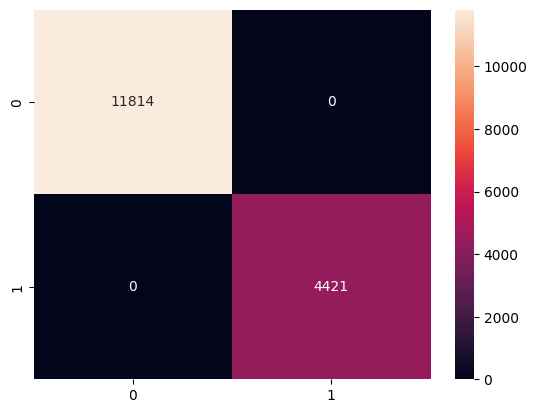

In [255]:
sns.heatmap(cnf_dtc, annot=True, fmt="d")
plt.show()

### Using Random Forest

In [256]:
## Creating a model for RandomForestClassifier and giving criterion as entropy
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1,criterion="entropy")

In [257]:
## Fitting data into the model by giving X_train and y_train
rfc.fit(X_tr, y_tr)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

In [258]:
## Checking model score
rfc.score(X_tr, y_tr)

1.0

In [259]:
## Predicting values
y_rfc = rfc.predict(X_te)

In [260]:
## Checking accuracy score 
accuracy_score(y_rfc, y_te)

1.0

In [261]:
cnf_rfc=confusion_matrix(y_rfc, y_te)
cnf_rfc

array([[11814,     0],
       [    0,  4421]], dtype=int64)

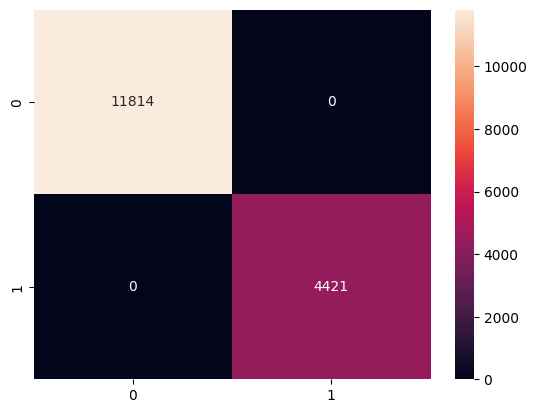

In [262]:
sns.heatmap(cnf_rfc, annot=True,fmt="d")
plt.show()

### Using K- Nearest Neighbour 

In [263]:
from sklearn.neighbors import KNeighborsClassifier

In [264]:
## Creating a model for KNeighborsClassifier.
knc = KNeighborsClassifier(n_neighbors=11)

In [265]:
## Fitting data into the model by giving X_train and y_train
knc.fit(X_tr,y_tr)

KNeighborsClassifier(n_neighbors=11)

In [266]:
## Checking model score
knc.score(X_tr, y_tr)

0.9970639564726415

In [267]:
## Predicting values
y_knc = knc.predict(X_te)

In [268]:
## Checking accuracy score 
accuracy_score(y_knc, y_te)

0.9969202340622113

In [269]:
cnf_knc=confusion_matrix(y_knc, y_te)
cnf_knc

array([[11814,    50],
       [    0,  4371]], dtype=int64)

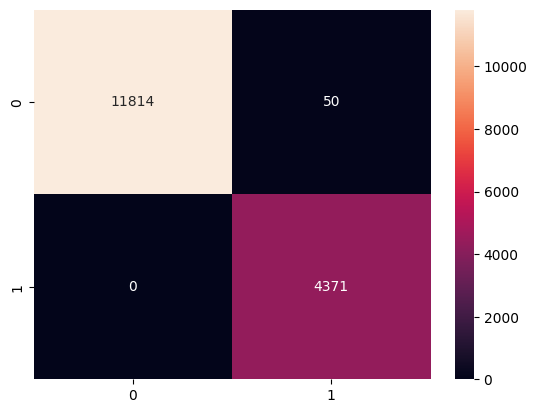

In [270]:
sns.heatmap(cnf_knc, annot=True,fmt="d")
plt.show()

### Using Ada Boost Classifier

In [271]:
from sklearn.ensemble import AdaBoostClassifier

In [272]:
## Creating a model for AdaBoostClassifier and giving estimator as model of decision tree classifier
abc = AdaBoostClassifier(estimator=dtc, n_estimators=500)

In [273]:
## Fitting data into the model by giving X_train and y_train
abc.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=500)

In [274]:
## Checking model score 
abc.score(X_tr, y_tr)

1.0

In [275]:
## Predicting values
y_abc = abc.predict(X_te)

In [276]:
## Checking accuracy score 
accuracy_score(y_te, y_abc)

1.0

In [277]:
cnf_abc = confusion_matrix(y_te, y_abc)
cnf_abc

array([[11814,     0],
       [    0,  4421]], dtype=int64)

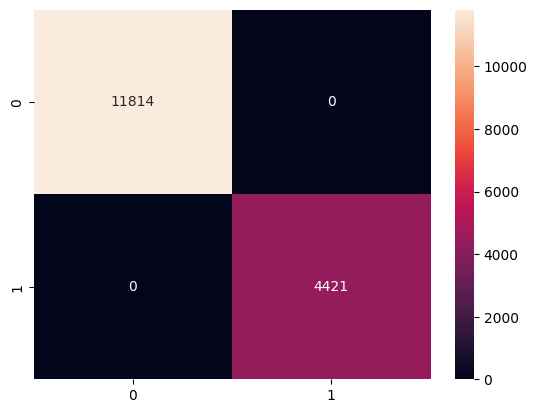

In [278]:
sns.heatmap(cnf_abc, annot=True,fmt="d")
plt.show()

## Conclusion
* Applied different algorithms on dataset without PCA.
* For all the algorithms found the accuracy almost equal.